In [2]:
# ============================================
# ⚡ PCA + Logistic Regression (IPL dataset)
# Evaluation: Accuracy, Precision, Recall, F1, MCC
# ============================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef
)

# Step 1: Load dataset
matches = pd.read_csv("matches.csv")
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# Step 2: Encode categorical columns
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("winner", axis=1)
y = data["winner"]

# Step 3: Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression on PCA features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Step 7: Evaluation Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
mcc = matthews_corrcoef(y_test, y_pred)

print("📊 PCA + Logistic Regression Results")
print(f"✅ Accuracy   : {acc:.4f}")
print(f"✅ Precision  : {prec:.4f}")
print(f"✅ Recall     : {rec:.4f}")
print(f"✅ F1 Score   : {f1:.4f}")
print(f"✅ MCC        : {mcc:.4f}")


📊 PCA + Logistic Regression Results
✅ Accuracy   : 0.2385
✅ Precision  : 0.0623
✅ Recall     : 0.1156
✅ F1 Score   : 0.0778
✅ MCC        : 0.1395


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


📊 PCA + Logistic Regression Metrics
✅ Accuracy   : 0.2385
✅ Precision  : 0.0623
✅ Recall     : 0.1156
✅ F1 Score   : 0.0778
✅ MCC        : 0.1395


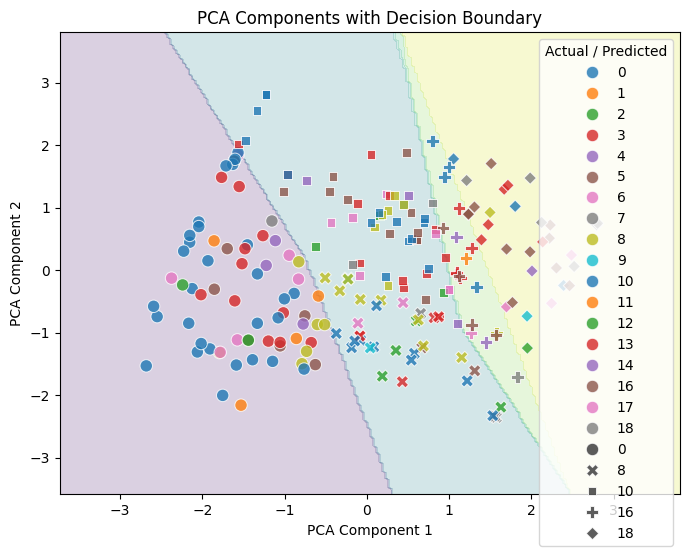

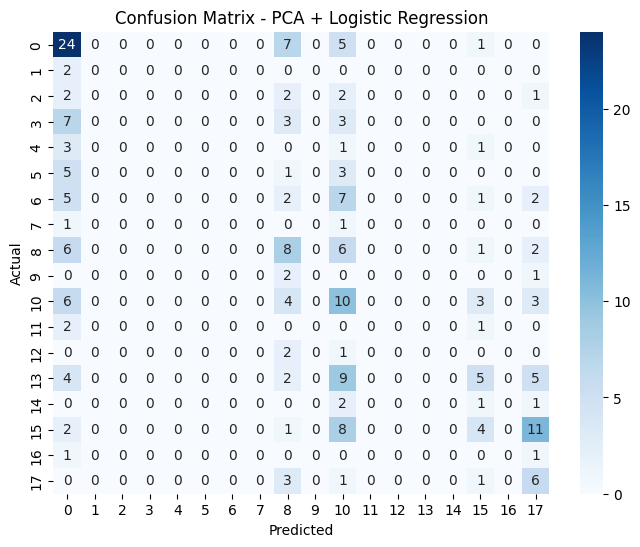

c:\Users\tarun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


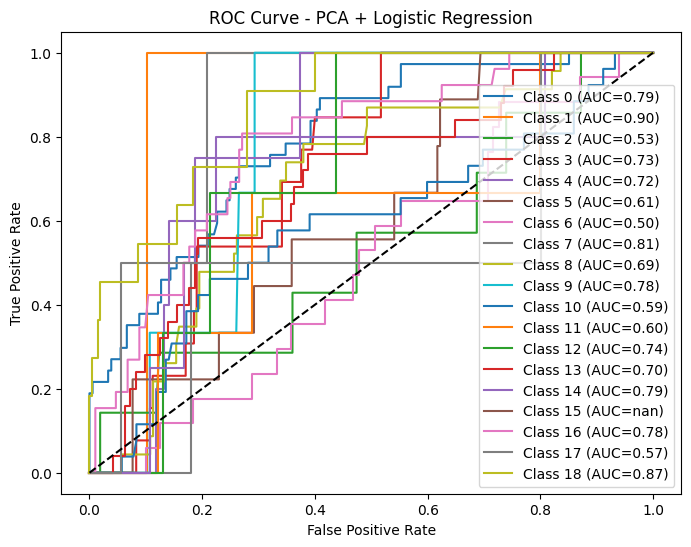

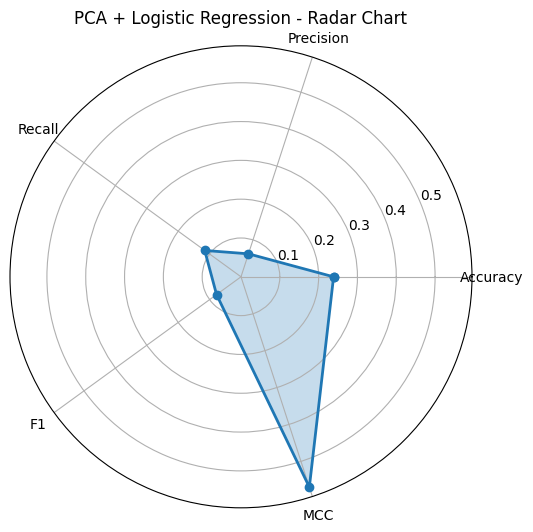

In [3]:
# =======================================================
# ⚡ PCA + Logistic Regression with Advanced Visualization
# =======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, roc_curve, auc
)

# Step 1: Load dataset
matches = pd.read_csv("matches.csv")
data = matches[["team1","team2","toss_winner","toss_decision","venue","winner"]].dropna()

# Step 2: Encode categorical
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("winner", axis=1)
y = data["winner"]

# Step 3: Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: PCA (reduce to 2D for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 6: Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

# Step 7: Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")
mcc = matthews_corrcoef(y_test, y_pred)
print("📊 PCA + Logistic Regression Metrics")
print(f"✅ Accuracy   : {acc:.4f}")
print(f"✅ Precision  : {prec:.4f}")
print(f"✅ Recall     : {rec:.4f}")
print(f"✅ F1 Score   : {f1:.4f}")
print(f"✅ MCC        : {mcc:.4f}")

# -----------------------------------
# 🔥 Advanced Visualizations
# -----------------------------------

# 1️⃣ Scatter Plot with Decision Boundary
plt.figure(figsize=(8,6))
x_min, x_max = X_pca[:, 0].min()-1, X_pca[:, 0].max()+1
y_min, y_max = X_pca[:, 1].min()-1, X_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap="viridis")
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, style=y_pred,
                palette="tab10", alpha=0.8, s=80)
plt.title("PCA Components with Decision Boundary")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Actual / Predicted")
plt.show()

# 2️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - PCA + Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3️⃣ ROC Curve (One-vs-Rest)
plt.figure(figsize=(8,6))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve(y_test==i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],"k--")
plt.title("ROC Curve - PCA + Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 4️⃣ Metrics Radar Chart
metrics = [acc, prec, rec, f1, (mcc+1)/2]  # normalize MCC [0,1]
labels = ["Accuracy","Precision","Recall","F1","MCC"]
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
metrics += metrics[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, metrics, 'o-', linewidth=2)
ax.fill(angles, metrics, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("PCA + Logistic Regression - Radar Chart")
plt.show()
